<a href="https://colab.research.google.com/github/djbetancourtr/A_B_experiment-proposal/blob/master/Heart_data_A_B_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Databases

This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is the only one that has been used by ML researchers to 
     this date.  The "goal" field refers to the presence of heart disease
     in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply
     attempting to distinguish presence (values 1,2,3,4) from absence (value
     0).

Columns Information:
 1. age: Age of the patient in years       
 2. gender: Gender of the patient  (1 = male; 0 = female)     
 3. cp: Chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic        
 4. trestbps: Resting blood pressure (in mmHG on admission to the hospital)
 5. chol: Serum cholesterol in mmHG on admission to the hospital      
 6. fbs: Fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)     
 7. restecg: Resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 8. thalach: Maximum heart rate achieved 
 9. exang: Exercise induced angina (1 = yes; 0 = no)   
 10. oldpeak: ST depression induced by exercise relative to rest  
 11. slope: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping     
 12. ca:   number of major vessels (0-3) colored by flourosopy     
 3. thal: Thallium tracer injection https://www.healthline.com/health/thallium-stress-test
  - Value 0: Null
  - Value 3: normal
  - Value 6: fixed defect
  - Value 7: reversable defect    
 14. num:   diagnosis of heart disease (angiographic disease status)
  - Value 0: < 50% diameter narrowing
  - Value 1: > 50% diameter narrowing

In [ ]:
# install this library
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing libraries
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
# reading and visualizing the dataset

heart_data = pd.read_csv('/content/drive/My Drive/processed.cleveland.csv')
heart_data.info()
heart_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


Looking at the data and data description, 9 columns have data as discrete variables and only 5 variables have continuous values: colesterol (chol), age, maximum heart rate (thalach), resting blood pressure at the admission to the hospital (trestbps)and oldpeak. Those variables will be used for our evaluation to determine if they are affected by the gender of the patient.

# Hypothesis
*“Male and female patients show same warning symptoms indicating heart disease”*

Before proceeding to test our hypothesis, we need to ensure that the data is clean. Since 9 out of 14 parameters have discrete values, it will be checked if the values are different than those expected

In [ ]:
# checking for data consistency (e.g: Gender colum must only have 2 values (0 and 1))
gender_count = heart_data['gender'].value_counts()
gender_count

1    206
0     97
Name: gender, dtype: int64

In [ ]:
cp_count = heart_data['cp'].value_counts()
cp_count

4    144
3     86
2     50
1     23
Name: cp, dtype: int64

In [ ]:
ca_count = heart_data['ca'].value_counts()
ca_count

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

Number of major vessels (ca) range from 0 - 3. There is 4 values with nulls or inconsistencies. Let's keep checking the data and we will clean it afterwards

In [ ]:
fbs_count = heart_data['fbs'].value_counts()
fbs_count

0    258
1     45
Name: fbs, dtype: int64

In [ ]:
restecg_count = heart_data['restecg'].value_counts()
restecg_count

0    151
2    148
1      4
Name: restecg, dtype: int64

In [ ]:
slope_count = heart_data['slope'].value_counts()
slope_count

1    142
2    140
3     21
Name: slope, dtype: int64

In [ ]:
thal_count = heart_data['thal'].value_counts()
thal_count

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

Again in Thallium (thal) variable 2 unknown or null values

In [ ]:
num_count = heart_data['num'].value_counts()
num_count

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Num is consistent with the expected values, but for processing purposes this data will be group into 2 values: 0 for no heart disease and > 1 for heart disease

Spurious data is present in columns ca and thal.Data will be located and excluded, as follows:

In [ ]:
ca_odd_values = heart_data[(heart_data.ca != '0') & (heart_data.ca != '1') & (heart_data.ca != '2') & (heart_data.ca != '3')]
ca_odd_values

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [ ]:
thal_odd_values = heart_data[(heart_data.thal != '3') & (heart_data.thal != '7') & (heart_data.thal != '6')]
thal_odd_values

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2


In [ ]:
heart_data = heart_data[~((heart_data.ca != '0') & (heart_data.ca != '1') & (heart_data.ca != '2') & (heart_data.ca != '3'))]
heart_data = heart_data[~((heart_data.thal != '3') & (heart_data.thal != '7') & (heart_data.thal != '6'))]

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [ ]:
heart_data.ca = heart_data.ca.astype('int')
heart_data.thal = heart_data.thal.astype('int')

In [ ]:
# For num values all numbers above 1 represent disease. Then the values will be change from a range of 0 to 4 to only values 0 (no_Disease) and 1 (Disease)
heart_data.num[heart_data['num'] >= 1] = 1
heart_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [ ]:
# For plotting purposes 2 more columns will be added with the gender and disease status description
heart_data['disease'] = heart_data['num']
heart_data['gender_desc'] = heart_data['gender']
heart_data['gender_desc'] = heart_data['gender_desc'].replace(0, 'Female')
heart_data['gender_desc'] = heart_data['gender_desc'].replace(1, 'Male')
heart_data['disease'] = heart_data['disease'].replace(0, 'No Disease')
heart_data['disease'] = heart_data['disease'].replace(1, 'Disease')

In [ ]:
heart_data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease,gender_desc
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No Disease,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Disease,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Disease,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No Disease,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No Disease,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1,Disease,Female
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Disease,Male
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Disease,Male
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Disease,Male


In [ ]:
heart_data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
heart_data = heart_data.assign(groups = heart_data.gender_desc + ' ' + heart_data.disease)
heart_data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease,gender_desc,groups
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No Disease,Male,Male No Disease
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Disease,Male,Male Disease
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Disease,Male,Male Disease
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No Disease,Male,Male No Disease
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No Disease,Female,Female No Disease


The final (clean) dataset to perform the evaluation has a total of 297 records and 14 variables (columns). From those, only the continuos variables will be selected to continue with the Experiment

Below the correlation between the available variables is calculated.It seems to be some level of correlation with num (presence or absence of the disease) with age, gender and blood pressure (trestbps) and a stronger negative correlation with maximum heart rate (thalach). There is also a good correlation with the chest pain level (cp) and thallium test (thal), but those variables are discrete and with not be used in the Experiment. Still, it needs to be determined if these are significant correlations and can be extrapolated to the general population.

In [ ]:
heart_data[['age', 'gender', 'cp', 'chol', 'fbs', 'thal', 'thalach', 'trestbps', 'num']].corr()

,age,gender,cp,chol,fbs,thal,thalach,trestbps,num
age,1.000000,-0.092399,0.110471,0.202644,0.132062,0.126586,-0.394563,0.290476,0.227075
gender,-0.092399,1.000000,0.008908,-0.198089,0.038850,0.383652,-0.060496,-0.066340,0.278467
cp,0.110471,0.008908,1.000000,0.072088,-0.057663,0.268500,-0.339308,-0.036980,0.408945
chol,0.202644,-0.198089,0.072088,1.000000,0.012708,0.010859,-0.000075,0.131536,0.080285
fbs,0.132062,0.038850,-0.057663,0.012708,1.000000,0.062209,-0.007842,0.180860,0.003167
thal,0.126586,0.383652,0.268500,0.010859,0.062209,1.000000,-0.274831,0.138183,0.526640
thalach,-0.394563,-0.060496,-0.339308,-0.000075,-0.007842,-0.274831,1.000000,-0.049108,-0.423817
trestbps,0.290476,-0.066340,-0.036980,0.131536,0.180860,0.138183,-0.049108,1.000000,0.153490
num,0.227075,0.278467,0.408945,0.080285,0.003167,0.526640,-0.423817,0.153490,1.000000


The variables selected for evaluation will be: thalach, chol, age, trestbp and old peak, because those are the continuous variables in the sample.
Boxplots per variable are presented below in an initial approach to understand the data

# Age Box Plot 

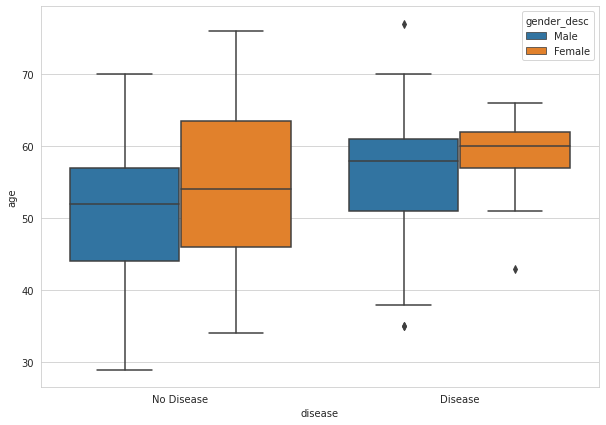

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(y='age', hue='gender_desc', x = 'disease', data=heart_data)
ax.set_xticklabels(ax.get_xticklabels());

Box plot for age variable shows that there is a difference in the median of the patients with heart disease depending on the gender, male or female. It also shows that there is a smaller range of ages when women develop the heart disease compare to males. Looks like male can develop heart disease as young as late thirties according to the sample, while the earliest female patients have shown heart disease is around fifty years old (except for an outlier showing early forties). Also, looking at the healthy male and females in the study, the range of ages for men in the sample is lower than the one for females, which could be a source of bias in the difference en ages found in the sick patients

# Cholesterol (chol) Box Plot

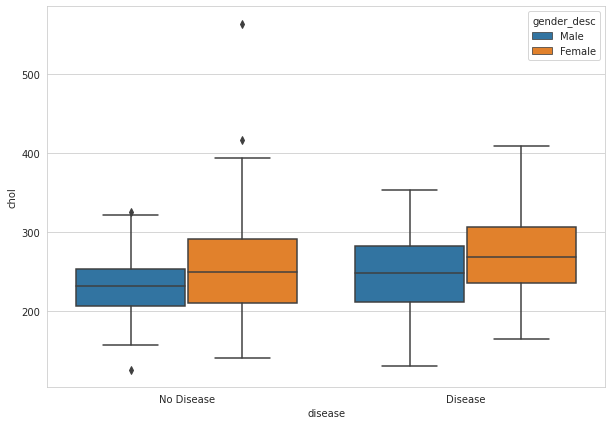

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(y='chol', hue='gender_desc', x = 'disease', data=heart_data)
ax.set_xticklabels(ax.get_xticklabels());

This box plot shows the mean in values in cholesterol for people developing heart disease is slightly different between males and females. Also the mean between healthy male is lower than for healthy women. In general, males in the population show lower cholesterol range of values than females. There are few big outliers in the colesterol values for healthy women

# Maximum heart rate (thalach) Box Plot

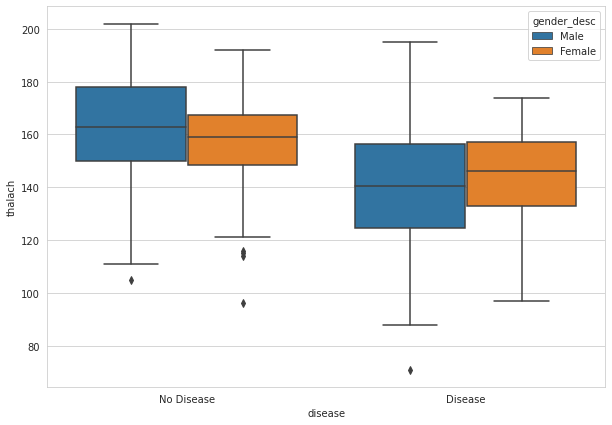

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(y='thalach', hue='gender_desc', x = 'disease', data=heart_data)
ax.set_xticklabels(ax.get_xticklabels());

Box plot for maximum heart rate shows an important difference between the maximum heart rate for patients with the disease and without the disease, showing that sick people will have much lower maximum heart rate than healthy patients. The median of the maximum heart rate in sick male patients is the lowest across the four groups and has a wider range of values than female patients

# Resting blood pressure (in mmHG) Box Plot

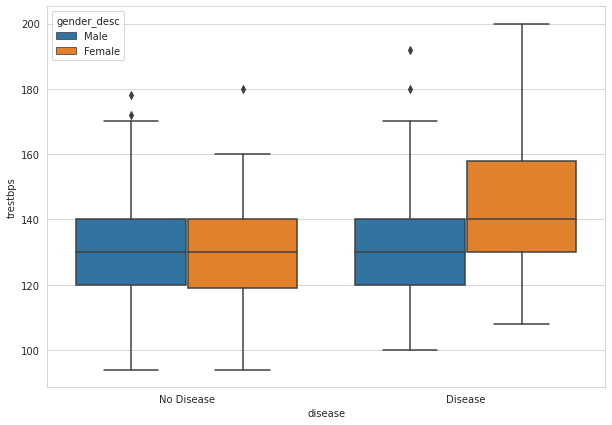

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(y='trestbps', hue='gender_desc', x = 'disease', data=heart_data)
ax.set_xticklabels(ax.get_xticklabels());

Blood pressure box plot shows same value for healthy male and female patients. However, a noticeable difference is observed between male and female with the heart disease, showing that females have a bigger range of values and higher median blood pressure than males.

# Data Distribution

Below will be presented a set of distribution plots as well as Shapiro test calculations used to check for normality in the data

Age Distribution Plot

DescribeResult(nobs=297, minmax=(29, 77), mean=54.54208754208754, variance=81.8977158977159, skewness=-0.21866298850409271, kurtosis=-0.5331455867755306)
(0.9859727025032043, 0.005422485060989857)


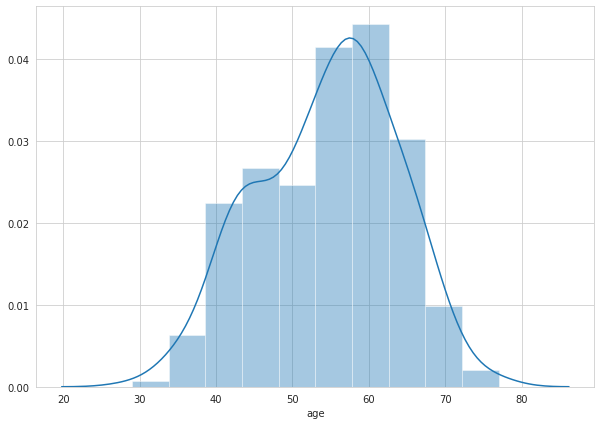

In [ ]:
print(stats.describe(heart_data['age']))
print(stats.shapiro(heart_data['age']))

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
ax = sns.distplot(heart_data['age'], bins=10)
plt.show()

Age variable histogram shows a "close to normal" distribution, however, values of Shapiro Wilk test indicates that the sample is not normally distributed (p_value < 0.05). Shapiro Wilks is sensitive to sample size, however sample size in this group is 297 data points, which is an acceptable sample size for the test to be considered reliable

Cholesterol (chol) Distribution Plot

DescribeResult(nobs=297, minmax=(126, 564), mean=247.35016835016836, variance=2703.7485894985894, skewness=1.1124406345568274, kurtosis=4.3494788937348225)
(0.9482876062393188, 1.019053552653304e-08)


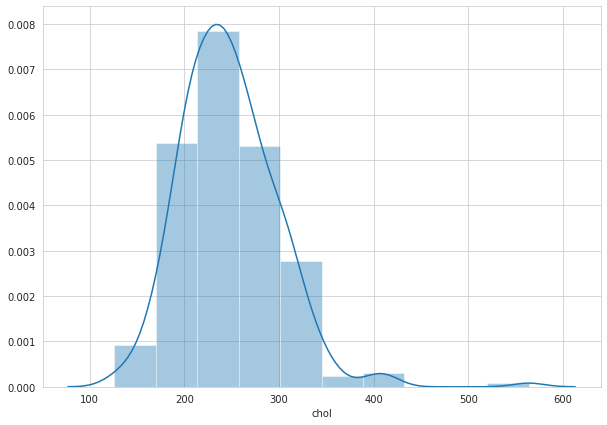

In [ ]:
print(stats.describe(heart_data['chol']))
print(stats.shapiro(heart_data['chol']))

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
ax = sns.distplot(heart_data['chol'], bins=10)
plt.show()

The histogram for the colesterol (chol) variable shows a not normal distribution. There are a couple of outliers (that are obvious in the boxplot)  that might be responsible for the deviation in the normality of the distribution. Shapiro Wilks p_value is < 0.05 indicating that, in fact, the sample does not have a normal distribution

Maximum Heart Rate (thalach) Distribution Plot

DescribeResult(nobs=297, minmax=(71, 202), mean=149.5993265993266, variance=526.3152698152699, skewness=-0.5338264709425441, kurtosis=-0.07111471609848197)
(0.9766384363174438, 9.040298027684912e-05)


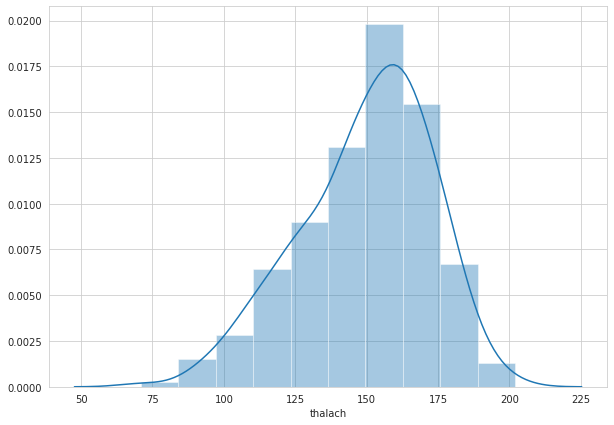

In [ ]:
print(stats.describe(heart_data['thalach']))
print(stats.shapiro(heart_data['thalach']))

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
ax = sns.distplot(heart_data['thalach'], bins=10)
plt.show()

For maximum heart rate achieved (thalach value) Shapiro-Wilk test p-value is < 0.05 which rejects the status quo of normality. The variable is considered not to have a normal distribution

Resting blood pressure (in mmHG) Distribution Plot

DescribeResult(nobs=297, minmax=(94, 200), mean=131.69360269360268, variance=315.51729001729, skewness=0.6965290400835603, kurtosis=0.7811918702633434)
(0.9667584896087646, 2.4160372049664147e-06)


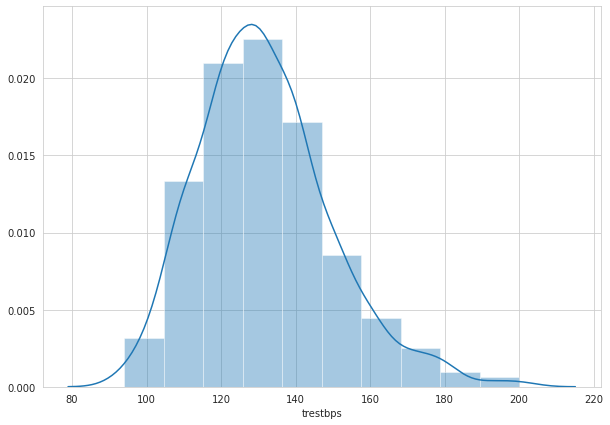

In [ ]:
print(stats.describe(heart_data['trestbps']))
print(stats.shapiro(heart_data['trestbps']))

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
ax = sns.distplot(heart_data['trestbps'], bins=10)
plt.show()

For resting blood pressure (trestbps value) Shapiro-Wilk test p-value is < 0.05 which rejects the hypothesis of normality. The variable is considered not to have a normal distribution

DescribeResult(nobs=297, minmax=(0.0, 6.2), mean=1.0555555555555556, variance=1.3598423423423422, skewness=1.2408238237336568, kurtosis=1.465519759643283)
(0.8481452465057373, 2.0405141489875323e-16)


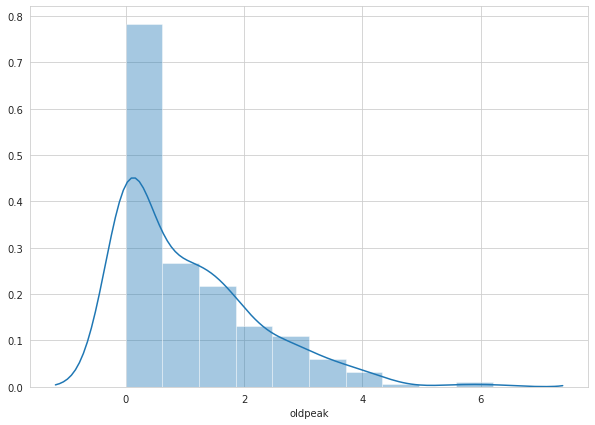

In [ ]:
print(stats.describe(heart_data['oldpeak']))
print(stats.shapiro(heart_data['oldpeak']))

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
ax = sns.distplot(heart_data['oldpeak'], bins=10)
plt.show()

Old peak variable seems to have a not normal distribution just using visual inspection of the plot. Shapiro Wilks test also confirms that the variable is not normaly distributed

All values of Shapiro - Wilk for evaluated samples indicate that none of the evaluated variables is normally distributed

# Grouping the Data for the Experiment

For the purpose of the study and to evaluate the statistical significance of the correlation of the selected variables with the possibility of the disease according the gender, the sample will be splitted in 4 different groups: male_disease, male_no_disease, female_disease, female_no_disease

Male with Heart Disease Group

In [ ]:
male_disease = (heart_data['gender']==1) & (heart_data['num']==1)
male_disease = heart_data.iloc[male_disease.values]
male_disease

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease,gender_desc,groups
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Disease,Male,Male Disease
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Disease,Male,Male Disease
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,Disease,Male,Male Disease
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,Disease,Male,Male Disease
12,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1,Disease,Male,Male Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63,1,4,140,187,0,2,144,1,4.0,1,2,7,1,Disease,Male,Male Disease
296,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1,Disease,Male,Male Disease
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Disease,Male,Male Disease
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Disease,Male,Male Disease


In [ ]:
male_disease.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,112.000000,112.0,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.0
mean,56.241071,1.0,3.535714,131.964286,246.428571,0.125000,1.169643,138.205357,0.535714,1.549107,1.785714,1.125000,5.973214,1.0
std,8.358246,0.0,0.869178,17.367739,45.670917,0.332205,0.985374,23.225157,0.500964,1.229810,0.576235,0.987535,1.668251,0.0
min,35.000000,1.0,1.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.0
25%,51.000000,1.0,3.000000,120.000000,212.000000,0.000000,0.000000,124.750000,0.000000,0.600000,1.000000,0.000000,6.000000,1.0
50%,58.000000,1.0,4.000000,130.000000,248.500000,0.000000,2.000000,140.500000,1.000000,1.400000,2.000000,1.000000,7.000000,1.0
75%,61.000000,1.0,4.000000,140.000000,282.000000,0.000000,2.000000,156.500000,1.000000,2.425000,2.000000,2.000000,7.000000,1.0
max,77.000000,1.0,4.000000,192.000000,353.000000,1.000000,2.000000,195.000000,1.000000,5.600000,3.000000,3.000000,7.000000,1.0


Male without Heart Disease Group

In [ ]:
male_no_disease = (heart_data['gender']==1) & (heart_data['num']==0)
male_no_disease = heart_data.iloc[male_no_disease.values]
male_no_disease

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease,gender_desc,groups
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,No Disease,Male,Male No Disease
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,No Disease,Male,Male No Disease
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,No Disease,Male,Male No Disease
10,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0,No Disease,Male,Male No Disease
13,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0,No Disease,Male,Male No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0,No Disease,Male,Male No Disease
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0,No Disease,Male,Male No Disease
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0,No Disease,Male,Male No Disease
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0,No Disease,Male,Male No Disease


In [ ]:
groups_count = heart_data['groups'].value_counts()
groups_count 

Male Disease         112
Male No Disease       89
Female No Disease     71
Female Disease        25
Name: groups, dtype: int64

In [ ]:
data = {'Group of Study':['Male Disease', 'Male No Disease', 'Female Disease', 'Female No Disease'], 'Number of Patients':[112, 89, 25, 71]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
print(df) 

      Group of Study  Number of Patients
0       Male Disease                 112
1    Male No Disease                  89
2     Female Disease                  25
3  Female No Disease                  71


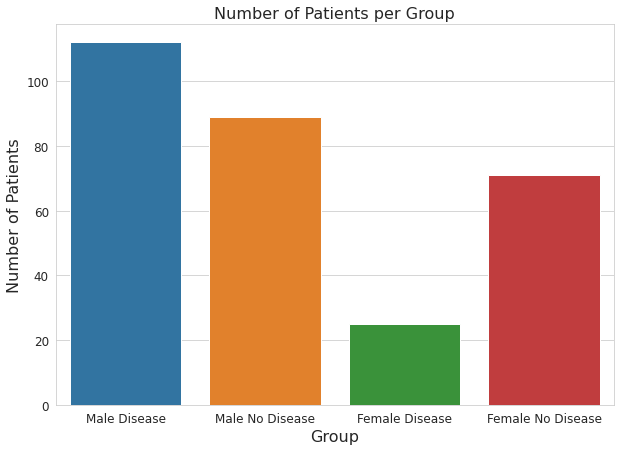

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Group of Study', y='Number of Patients', 
            data=df) #, palette='Paired')
plt.title('Number of Patients per Group', size=16)
plt.ylabel('Number of Patients', size=16)
plt.xlabel('Group', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
#sns.despine()
plt.show()

In [ ]:
male_no_disease.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0
mean,51.101124,1.0,2.696629,129.516854,232.460674,0.191011,0.831461,161.775281,0.168539,0.628090,1.404494,0.247191,4.325843,0.0
std,8.626130,0.0,0.981702,16.233462,37.757316,0.395325,0.991280,18.720888,0.376465,0.884589,0.634592,0.661968,1.838819,0.0
min,29.000000,1.0,1.000000,94.000000,126.000000,0.000000,0.000000,105.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
25%,44.000000,1.0,2.000000,120.000000,207.000000,0.000000,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
50%,52.000000,1.0,3.000000,130.000000,232.000000,0.000000,0.000000,163.000000,0.000000,0.200000,1.000000,0.000000,3.000000,0.0
75%,57.000000,1.0,3.000000,140.000000,253.000000,0.000000,2.000000,178.000000,0.000000,1.200000,2.000000,0.000000,7.000000,0.0
max,70.000000,1.0,4.000000,178.000000,325.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,0.0


Female with Heart Disease

In [ ]:
female_disease = (heart_data['gender']==0) & (heart_data['num']==1)
female_disease = heart_data.iloc[female_disease.values]
female_disease

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease,gender_desc,groups
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,Disease,Female,Female Disease
40,65,0,4,150,225,0,2,114,0,1.0,2,3,7,1,Disease,Female,Female Disease
44,61,0,4,130,330,0,2,169,0,0.0,1,0,3,1,Disease,Female,Female Disease
60,51,0,4,130,305,0,0,142,1,1.2,2,0,7,1,Disease,Female,Female Disease
91,62,0,4,160,164,0,2,145,0,6.2,3,3,7,1,Disease,Female,Female Disease
97,60,0,4,150,258,0,2,157,0,2.6,2,2,7,1,Disease,Female,Female Disease
110,61,0,4,145,307,0,2,146,1,1.0,2,0,7,1,Disease,Female,Female Disease
113,43,0,4,132,341,1,2,136,1,3.0,2,0,7,1,Disease,Female,Female Disease
114,62,0,3,130,263,0,0,97,0,1.2,2,1,7,1,Disease,Female,Female Disease
121,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1,Disease,Female,Female Disease


In [ ]:
female_disease.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,25.000000,25.0,25.00000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.0,25.00000,25.0,25.0
mean,59.080000,0.0,3.80000,146.600000,276.160000,0.24000,1.200000,143.160000,0.560000,1.768000,2.0,1.24000,5.2,1.0
std,4.864155,0.0,0.57735,21.118712,59.884389,0.43589,0.957427,20.175645,0.506623,1.617024,0.5,1.16476,2.0,0.0
min,43.000000,0.0,2.00000,108.000000,164.000000,0.00000,0.000000,97.000000,0.000000,0.000000,1.0,0.00000,3.0,1.0
25%,57.000000,0.0,4.00000,130.000000,236.000000,0.00000,0.000000,133.000000,0.000000,0.200000,2.0,0.00000,3.0,1.0
50%,60.000000,0.0,4.00000,140.000000,268.000000,0.00000,2.000000,146.000000,1.000000,1.400000,2.0,1.00000,7.0,1.0
75%,62.000000,0.0,4.00000,158.000000,307.000000,0.00000,2.000000,157.000000,1.000000,2.800000,2.0,2.00000,7.0,1.0
max,66.000000,0.0,4.00000,200.000000,409.000000,1.00000,2.000000,174.000000,1.000000,6.200000,3.0,3.00000,7.0,1.0


Female with Heart Disease sample size has only 25 data points. This sample is small and reliability of tests such as Shapiro Wilks can be affected for the size of this sample. Also this might cause some bias in the results

Female without Heart Disease Group

In [ ]:
female_no_disease = (heart_data['gender']==0) & (heart_data['num']==0)
female_no_disease = heart_data.iloc[female_no_disease.values]
female_no_disease

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease,gender_desc,groups
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,No Disease,Female,Female No Disease
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,No Disease,Female,Female No Disease
11,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0,No Disease,Female,Female No Disease
18,48,0,3,130,275,0,0,139,0,0.2,1,0,3,0,No Disease,Female,Female No Disease
21,58,0,1,150,283,1,2,162,0,1.0,1,0,3,0,No Disease,Female,Female No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,71,0,4,112,149,0,0,125,0,1.6,2,0,3,0,No Disease,Female,Female No Disease
276,66,0,3,146,278,0,2,152,0,0.0,2,1,3,0,No Disease,Female,Female No Disease
277,39,0,3,138,220,0,0,152,0,0.0,2,0,3,0,No Disease,Female,Female No Disease
279,58,0,4,130,197,0,0,131,0,0.6,2,0,3,0,No Disease,Female,Female No Disease


In [ ]:
female_no_disease.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,54.577465,0.0,2.915493,128.746479,257.323944,0.084507,0.859155,154.577465,0.112676,0.561972,1.422535,0.309859,3.112676,0.0
std,10.336706,0.0,0.840858,16.654230,66.506879,0.280126,0.989889,18.812353,0.318447,0.649036,0.551931,0.599799,0.666533,0.0
min,34.000000,0.0,1.000000,94.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
25%,46.000000,0.0,2.000000,119.000000,210.500000,0.000000,0.000000,148.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
50%,54.000000,0.0,3.000000,130.000000,250.000000,0.000000,0.000000,159.000000,0.000000,0.300000,1.000000,0.000000,3.000000,0.0
75%,63.500000,0.0,3.500000,140.000000,291.000000,0.000000,2.000000,167.500000,0.000000,1.050000,2.000000,0.000000,3.000000,0.0
max,76.000000,0.0,4.000000,180.000000,564.000000,1.000000,2.000000,192.000000,1.000000,2.600000,3.000000,2.000000,7.000000,0.0


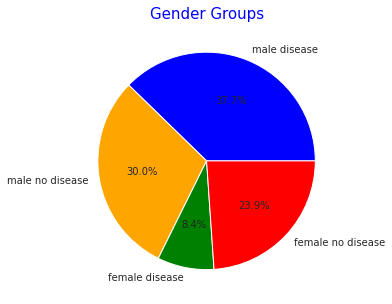

In [ ]:
colors = ['blue','orange','green','red']
explode = [0,0,0,0]
plt.figure(figsize = (5,5))
plt.pie([len(male_disease),len(male_no_disease),len(female_disease), len(female_no_disease)],labels=['male disease','male no disease','female disease', 'female no disease'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Gender Groups',color = 'blue',fontsize = 15)
plt.show()

# Statistical Tests

Following, the distribution for the each of the groups selected (male_disease, male_no_disease, female_disease, female_no_disease) is calculated for each one of the selected variables.
Depending on the type of distribution a parametric or non- parametric test will be apply as appropiate.

# Maximum Heart Rate (Thalach)

DescribeResult(nobs=112, minmax=(71, 195), mean=138.20535714285714, variance=539.4078989703991, skewness=-0.21870839282333548, kurtosis=-0.2595177732459084)
(0.9920493364334106, 0.7665610909461975)


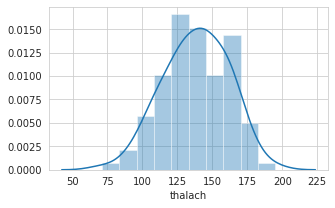

In [ ]:
print(stats.describe(male_disease['thalach']))
print(stats.shapiro(male_disease['thalach']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_disease['thalach'], bins=10)
plt.show()

The thalach variable histogram in plotted above for the male_disease group. This distribution seems to be normal. Applying Shapiro-Wilks test, p_value is > 0.05, indicating that in fact, the sample is normally distributed. 

DescribeResult(nobs=89, minmax=(105, 202), mean=161.77528089887642, variance=350.4716547497447, skewness=-0.5644163722757881, kurtosis=0.23469849944462062)
(0.9759578108787537, 0.09718204289674759)


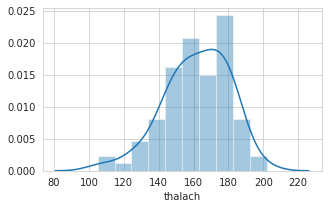

In [ ]:
print(stats.describe(male_no_disease['thalach']))
print(stats.shapiro(male_no_disease['thalach']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_no_disease['thalach'], bins=10)
plt.show()

In the above plot, the maximum heart rate (thalach) seems to be normally distributed. Results from Shapiro Wilks test shows p_value > 0.05, which indicates that in fact, the sample is normally distributed. This group has 89 data points, which is still a good size sample for Shapiro Wiks test 

DescribeResult(nobs=25, minmax=(97, 174), mean=143.16, variance=407.0566666666667, skewness=-0.5884988323293869, kurtosis=-0.3471562216784476)
(0.9602130055427551, 0.4187338352203369)


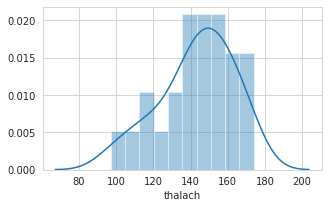

In [ ]:
print(stats.describe(female_disease['thalach']))
print(stats.shapiro(female_disease['thalach']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_disease['thalach'], bins=10)
plt.show()

For females that showed heart disease, the visual inspection distribution for maximum heart rate (thalach) shows distribution similar to normal, but with a strange bin distribution. The p_value for Shapiro Wilks is > 0.05, indicating that the sample is in fact normally distributed. The sample size for this group is 25 which affects the reliability of Shapiro Wilks test results. This variable-group will be considered as normally distributed and as such will be tested statistically for significance in the correlation with heart disease variable

DescribeResult(nobs=71, minmax=(96, 192), mean=154.57746478873239, variance=353.90462776659956, skewness=-0.913052491577322, kurtosis=0.5028921398793256)
(0.927707314491272, 0.0005300351185724139)


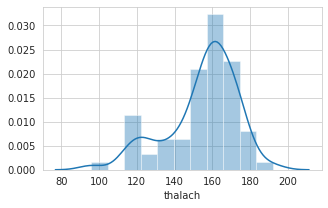

In [ ]:
print(stats.describe(female_no_disease['thalach']))
print(stats.shapiro(female_no_disease['thalach']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_no_disease['thalach'])

The distribution for the female group with no disease is not normal as per visual inspection of the distribution plot and Shapiro Wilks p_value results

Comparing all four groups using Kruskal Wallis test because the female group with no disease is not normally distributed. p_value < 0.05 indicates that all groups are not the same and there is a significant difference among them

In [ ]:
stats.kruskal(male_disease['thalach'],male_no_disease['thalach'],female_disease['thalach'], female_no_disease['thalach'])

KruskalResult(statistic=58.82361329846048, pvalue=1.0484166472963842e-12)

Comparing the Maximum Heart Rate for male and female with heart disease (code cell below), as per our hyphotesis, ttest shows a p_value > 0.05. T-test was used since both groups are are normally distributed. This indicates that given the data we are presented with, we fail to reject the null. According to this results, the difference between the samples is not significant and is it can not be extrapolated to the general population

In [ ]:
stats.ttest_ind(male_disease['thalach'], female_disease['thalach'])

Ttest_indResult(statistic=-0.9861824062595997, pvalue=0.3258078061310282)

As part of gaining addition insight of the data (beyond the tested hyphotesis) the comparison between male groups as well as female groups is evaluated below. Also, the difference between healthy male and female

Interestingly, there is significant difference between the maximum heart rate between healthy males and females

In [ ]:
stats.kruskal(male_no_disease['thalach'], female_no_disease['thalach'])

KruskalResult(statistic=5.110031074150917, pvalue=0.0237878941429904)

There is also a significant dissference between females with and without heart disease

In [ ]:
stats.kruskal(female_disease['thalach'], female_no_disease['thalach'])

KruskalResult(statistic=6.835006642498727, pvalue=0.008938836123548382)

Male groups both presented a normal distribution. In such a case the ttest is applied insted of Kruskal Wallis test

In [ ]:
stats.ttest_ind(male_disease['thalach'], male_no_disease['thalach'])

Ttest_indResult(statistic=-7.774084851800002, pvalue=3.992946214332269e-13)

For all other groups combinations (sick and healthy male, sick and healthy female as well as healthy male and female) seem that there is a significant difference in values of Maximum Heart Rate. This trend could be later evaluated as part of a different experiment

# Cholesterol

DescribeResult(nobs=112, minmax=(131, 353), mean=246.42857142857142, variance=2085.83268983269, skewness=-0.06484759162580518, kurtosis=-0.5241189360045242)
(0.9929131865501404, 0.8375210762023926)


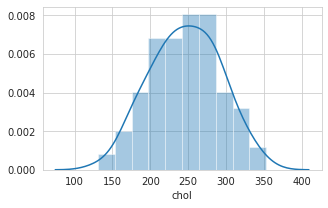

In [ ]:
print(stats.describe(male_disease['chol']))
print(stats.shapiro(male_disease['chol']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_disease['chol'], bins=10)
plt.show()

Cholesterol values distribution for males with the disease seems to be normal as per visual inspection, which is confirmed by the Shapiro Wilks p_value > 0.05

DescribeResult(nobs=89, minmax=(126, 325), mean=232.46067415730337, variance=1425.6149131767108, skewness=0.284966567479557, kurtosis=0.3181689453860863)
(0.9796720743179321, 0.17673328518867493)


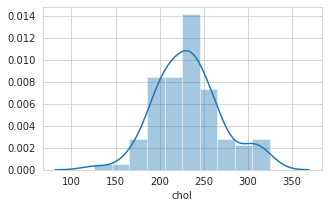

In [ ]:
print(stats.describe(male_no_disease['chol']))
print(stats.shapiro(male_no_disease['chol']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_no_disease['chol'], bins=10)
plt.show()

Healthy males cholesterol group distribution shows a distribution similar to normal. This is confirm with Shapiro Wilks p_value >0.05. This group has 89 data point which is considered a good sample size for Shapiro Wilks test

DescribeResult(nobs=25, minmax=(164, 409), mean=276.16, variance=3586.14, skewness=0.49303575177914233, kurtosis=0.007484751769346598)
(0.9657630324363708, 0.540614128112793)


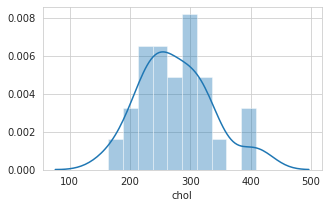

In [ ]:
print(stats.describe(female_disease['chol']))
print(stats.shapiro(female_disease['chol']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_disease['chol'], bins=10)
plt.show()

Females with a disease show cholesterol levels that have a normal distribution as per plot and statistical test above

DescribeResult(nobs=71, minmax=(141, 564), mean=257.32394366197184, variance=4423.164989939638, skewness=1.5764327069766146, kurtosis=5.063452404151107)
(0.9003003239631653, 3.5389457480050623e-05)


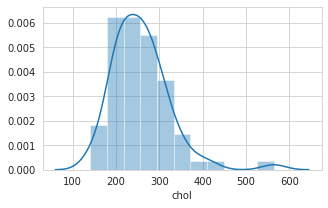

In [ ]:
print(stats.describe(female_no_disease['chol']))
print(stats.shapiro(female_no_disease['chol']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_no_disease['chol'])

In [ ]:
stats.kruskal(male_disease['chol'],male_no_disease['chol'],female_disease['chol'], female_no_disease['chol'])

KruskalResult(statistic=15.0557394549677, pvalue=0.0017696299904152917)

In [ ]:
stats.ttest_ind(male_disease['chol'], female_disease['chol'])

Ttest_indResult(statistic=-2.7711798330739494, pvalue=0.006373753817241205)

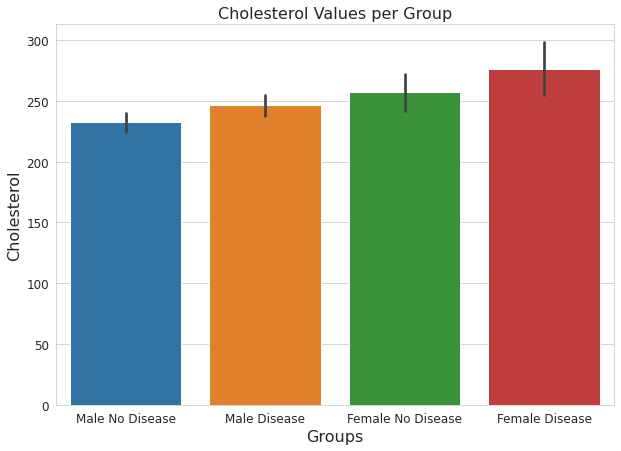

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="groups", y="chol", data=heart_data)
plt.title('Cholesterol Values per Group', size=16)
plt.ylabel('Cholesterol', size=16)
plt.xlabel('Groups', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
#sns.despine()
plt.show()

Ttest p_value is < 0.05, meaning we can reject the null and in fact the values are significantly different in both groups, male and females with heart disease

Below is presented the quantification of the median for this values:

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(male_disease['chol'], female_disease['chol'])

'The difference in means at the 95% confidence interval (two-tail) is between 4.77938099570326 and 54.683476147153954.'

Available data shows that with 95% confidence female patients have cholesterol levels between 4.77 and 54.68 mmHG on admission to the hospital, higher than male patients

In [ ]:
stats.kruskal(male_no_disease['chol'], female_no_disease['chol'])

KruskalResult(statistic=6.081739296908078, pvalue=0.013658622903168912)

In [ ]:
stats.ttest_ind(male_disease['chol'], male_no_disease['chol'])

Ttest_indResult(statistic=2.3224195382860833, pvalue=0.02122151650835397)

In [ ]:
stats.kruskal(female_disease['chol'], female_no_disease['chol'])

KruskalResult(statistic=2.4769113029759784, pvalue=0.11552892858609776)

# Blood Pressure

DescribeResult(nobs=112, minmax=(100, 192), mean=131.96428571428572, variance=301.6383526383526, skewness=0.7387176127283033, kurtosis=0.5423946094414815)
(0.9575273990631104, 0.0012953875120729208)


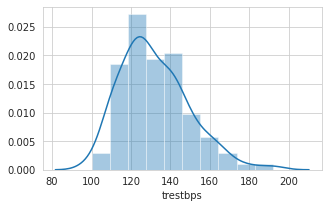

In [ ]:
print(stats.describe(male_disease['trestbps']))
print(stats.shapiro(male_disease['trestbps']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_disease['trestbps'], bins=10)
plt.show()

Resting blood pressure for sample of males with the disease have a p_value for Shapiro Wilks test < 0.05. Which means the sample is not normally distributed.

DescribeResult(nobs=89, minmax=(94, 178), mean=129.51685393258427, variance=263.5252808988764, skewness=0.5423454967515277, kurtosis=0.42820957614450306)
(0.9711126089096069, 0.04433523863554001)


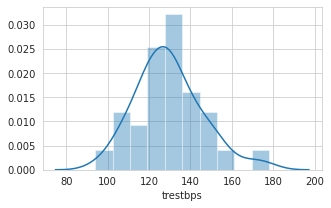

In [ ]:
print(stats.describe(male_no_disease['trestbps']))
print(stats.shapiro(male_no_disease['trestbps']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_no_disease['trestbps'], bins=10)
plt.show()

Both male groups are not normally distributed to blood pressure, according to p_value < 0.05 and visual inspection

DescribeResult(nobs=25, minmax=(108, 200), mean=146.6, variance=446.0, skewness=0.7071027800315837, kurtosis=0.11103074497107723)
(0.9419654607772827, 0.16432629525661469)


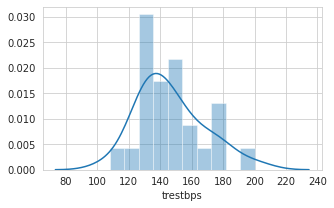

In [ ]:
print(stats.describe(female_disease['trestbps']))
print(stats.shapiro(female_disease['trestbps']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_disease['trestbps'], bins=10)
plt.show()

DescribeResult(nobs=71, minmax=(94, 180), mean=128.74647887323943, variance=277.3633802816901, skewness=0.3221284153092897, kurtosis=0.1272767128376917)
(0.9792959094047546, 0.2902149260044098)


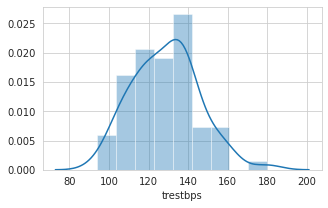

In [ ]:
print(stats.describe(female_no_disease['trestbps']))
print(stats.shapiro(female_no_disease['trestbps']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_no_disease['trestbps'])

Test for normality for female samples (both with and without disease) show p_value > 0.05, which indicates normality of the distribution

Using Kruskal Wallis to investigate the difference between male and female with heart disease in blood pressure while resting:

In [ ]:
stats.kruskal(male_disease['trestbps'], female_disease['trestbps'])

KruskalResult(statistic=10.583322507753362, pvalue=0.0011411239201663628)

p_value for Kruskal Wallis is < 0.05 which indicates that there is a significant difference between male and female blood pressure that were diagnosed with heart disease.

The found difference will be quantify as follows:

In [ ]:
trestbp_diff = male_disease['trestbps'].median() - female_disease['trestbps'].median()
print ('The difference between the median in blood pressure for male and females with heart disease is {}'.format(trestbp_diff))

The difference between the median in blood pressure for male and females with heart disease is -10.0


This results indicate that the median resting blood pressure for females is 10 points higher than for males

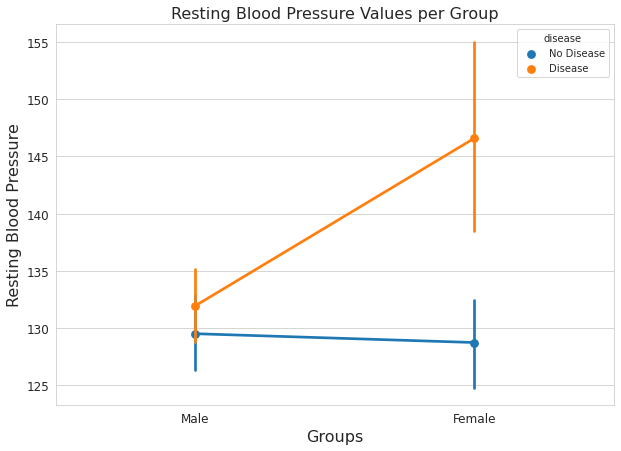

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.pointplot(x="gender_desc", y="trestbps", hue='disease', data=heart_data)
plt.title('Resting Blood Pressure Values per Group', size=16)
plt.ylabel('Resting Blood Pressure', size=16)
plt.xlabel('Groups', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
#sns.despine()
plt.show()

In [ ]:
stats.kruskal(male_no_disease['trestbps'], female_no_disease['trestbps'])

KruskalResult(statistic=0.0068468293254406775, pvalue=0.9340538496076951)

In [ ]:
stats.kruskal(male_disease['trestbps'], male_no_disease['trestbps'])

KruskalResult(statistic=0.7097693079181195, pvalue=0.399520406709713)

In [ ]:
stats.ttest_ind(female_disease['trestbps'], female_no_disease['trestbps'])

Ttest_indResult(statistic=4.288722523497636, pvalue=4.3532950581106196e-05)

There is a significant difference between females with and without heart disease

# Age

DescribeResult(nobs=112, minmax=(35, 77), mean=56.24107142857143, variance=69.86027992277991, skewness=-0.4169107481338149, kurtosis=-0.11965382647486145)
(0.9758407473564148, 0.03978341817855835)


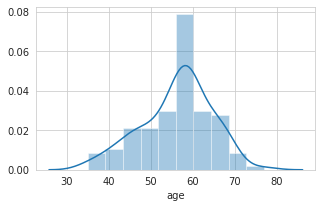

In [ ]:
print(stats.describe(male_disease['age']))
print(stats.shapiro(male_disease['age']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_disease['age'], bins=10)
plt.show()

Plot and test above show that the age variable in group of males with heart disease  has NOT normal distribution according to p_value < 0.05 for statistical test, while males without heart disease age distribution (below) has a normal distribution (p_value > 0.05 for Shapiro Wilks) 

DescribeResult(nobs=89, minmax=(29, 70), mean=51.10112359550562, variance=74.41011235955055, skewness=0.05131905228809904, kurtosis=-0.4804601971570164)
(0.9851824045181274, 0.40866944193840027)


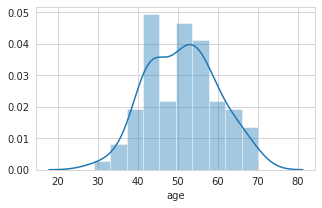

In [ ]:
print(stats.describe(male_no_disease['age']))
print(stats.shapiro(male_no_disease['age']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_no_disease['age'], bins=10)
plt.show()

DescribeResult(nobs=25, minmax=(43, 66), mean=59.08, variance=23.66, skewness=-1.4929458052584799, kurtosis=2.9324642184873637)
(0.8768932819366455, 0.005966348107904196)


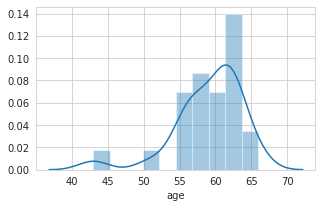

In [ ]:
print(stats.describe(female_disease['age']))
print(stats.shapiro(female_disease['age']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_disease['age'], bins=10)
plt.show()

Sample of females with heart disease have a not normal distribution, while age for healthy females has a normal distribution according to Shapiro Wilks statistical test

DescribeResult(nobs=71, minmax=(34, 76), mean=54.57746478873239, variance=106.84748490945674, skewness=0.005942657543967759, kurtosis=-0.910482497886083)
(0.9785856008529663, 0.2656019628047943)


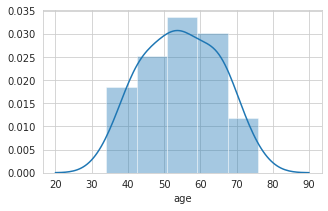

In [ ]:
print(stats.describe(female_no_disease['age']))
print(stats.shapiro(female_no_disease['age']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_no_disease['age'])

In [ ]:
stats.kruskal(male_disease['age'], female_disease['age'])

KruskalResult(statistic=2.9435563530064175, pvalue=0.08622070783019321)

Kruskal Wallis test was used to evaluate the significance of age in heart disease for male and female, since both groups showed not normal distribution. Results show that there is no significant difference in the age of both groups, therefore, given the data available, we fail to reject the null

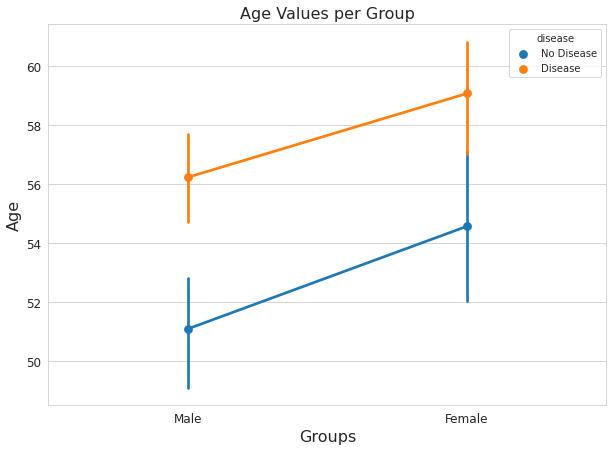

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.pointplot(x="gender_desc", y="age", hue='disease', data=heart_data)
plt.title('Age Values per Group', size=16)
plt.ylabel('Age', size=16)
plt.xlabel('Groups', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
#sns.despine()
plt.show()

# Old Peak

DescribeResult(nobs=112, minmax=(0.0, 5.6), mean=1.5491071428571428, variance=1.5124316280566281, skewness=0.5782301142660079, kurtosis=-0.12544765562600446)
(0.9419331550598145, 0.0001033881344483234)


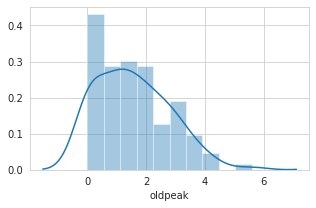

In [ ]:
print(stats.describe(male_disease['oldpeak']))
print(stats.shapiro(male_disease['oldpeak']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_disease['oldpeak'], bins=10)
plt.show()

DescribeResult(nobs=89, minmax=(0.0, 4.2), mean=0.6280898876404494, variance=0.7824974463738509, skewness=1.6924091609074632, kurtosis=2.8632061594212077)
(0.7497133016586304, 5.1767756747977955e-11)


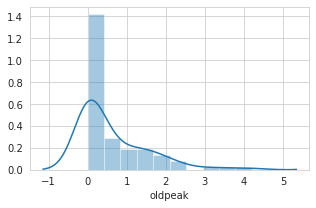

In [ ]:
print(stats.describe(male_no_disease['oldpeak']))
print(stats.shapiro(male_no_disease['oldpeak']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(male_no_disease['oldpeak'], bins=10)
plt.show()

DescribeResult(nobs=25, minmax=(0.0, 6.2), mean=1.768, variance=2.6147666666666667, skewness=0.8505216137796744, kurtosis=0.32448609928957994)
(0.905360221862793, 0.024046415463089943)


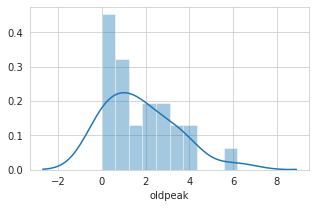

In [ ]:
print(stats.describe(female_disease['oldpeak']))
print(stats.shapiro(female_disease['oldpeak']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_disease['oldpeak'], bins=10)
plt.show()

DescribeResult(nobs=71, minmax=(0.0, 2.6), mean=0.5619718309859155, variance=0.42124748490945674, skewness=0.9351619160716356, kurtosis=-0.06284657536281557)
(0.8278738856315613, 1.2210060162942682e-07)


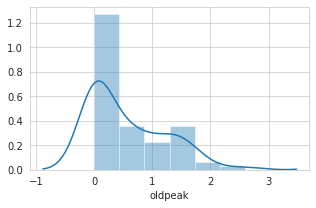

In [ ]:
print(stats.describe(female_no_disease['oldpeak']))
print(stats.shapiro(female_no_disease['oldpeak']))

sns.set_style('whitegrid')
plt.figure(figsize=(5,3))
ax = sns.distplot(female_no_disease['oldpeak'])

All samples have a not normal distribution for old peak. Kruskal Wallis test indicates 

In [ ]:
stats.kruskal(male_disease['oldpeak'], female_disease['oldpeak'])

KruskalResult(statistic=0.11461892336049258, pvalue=0.7349456156275564)

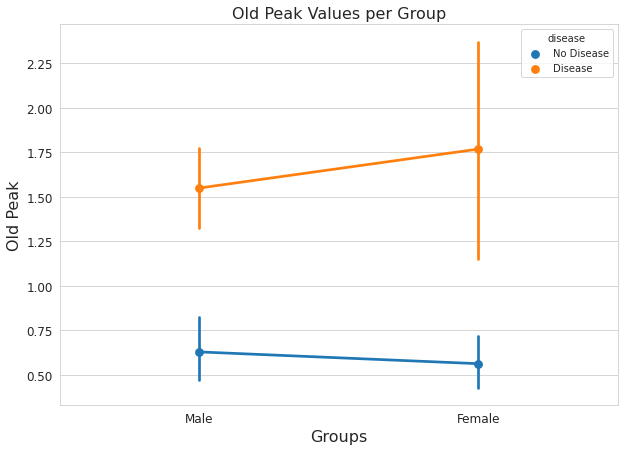

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.pointplot(x="gender_desc", y="oldpeak", hue='disease', data=heart_data)
plt.title('Old Peak Values per Group', size=16)
plt.ylabel('Old Peak', size=16)
plt.xlabel('Groups', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
#sns.despine()
plt.show()

# Conclusion

Maximum heart rate (thalach), blood pressure (tretsbps), cholesterol (chol), age and old peak were the variables selected to evaluate if male patients with heart disease show the same warning symptoms than female patients.

Results show that:

1.   Cholesterol values have a significant difference between males and females with heart disease. With the available data with can say with 95% confidence that female patients have cholesterol levels between 4.77 and 54.68 mmHG higher than male patients on admission to the hospital.   
2.   The resting blood pressure in mmHg (on admission to the hospital) also showed significant difference between the male and female groups with heart disease. The females showed a much higher blood pressure than males by 10 points.
3.   Given the data available, age, maximum heart rate (thalach) and old peak variables do not have significance difference between male and females. 
4.  According to the experiment, certain symptoms of heart disease might be significantly difference between male and female (in this study 2 of those parameters were identified)




# Recommendations

1.   The sample seems to have some bias in age of the participants with a more ample range for males than females. It is recommended to colect additional data for more reliable results.
2.   Additional variables could be tested for difference between male and female if more data is collected as a continuous variable instead of discrete variable, when possible (e.g: blood sugar levels (fbs) could have been collected as discrete variable, instead of as a discrete variable.
3.   It would give addional tools for a better interpretation if other variables are incorporated in the database, like family history of heart disease and smoking history.